In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import io
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [6]:
#data = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
data = pd.read_csv('titanic.csv')
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


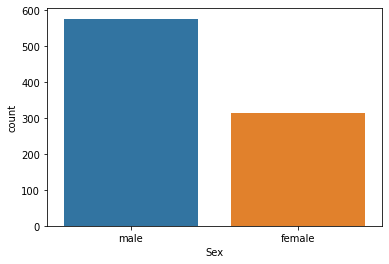

In [ ]:
sns.countplot(x = data.Sex)

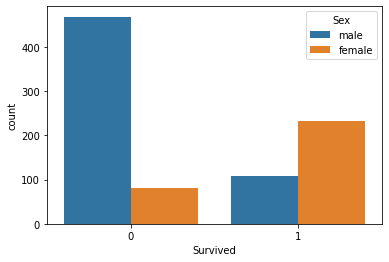

In [ ]:
sns.countplot(x = data.Survived, hue = data.Sex)

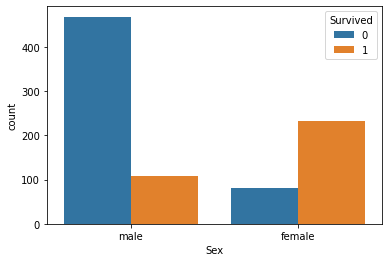

In [ ]:
sns.countplot(hue = data.Survived, x = data.Sex)

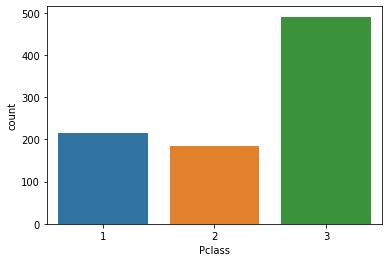

In [ ]:
sns.countplot(x = data.Pclass)

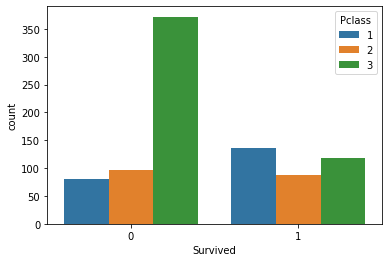

In [ ]:
sns.countplot(x = data.Survived, hue = data.Pclass)

Text(0.5, 1.0, 'Age disributation')

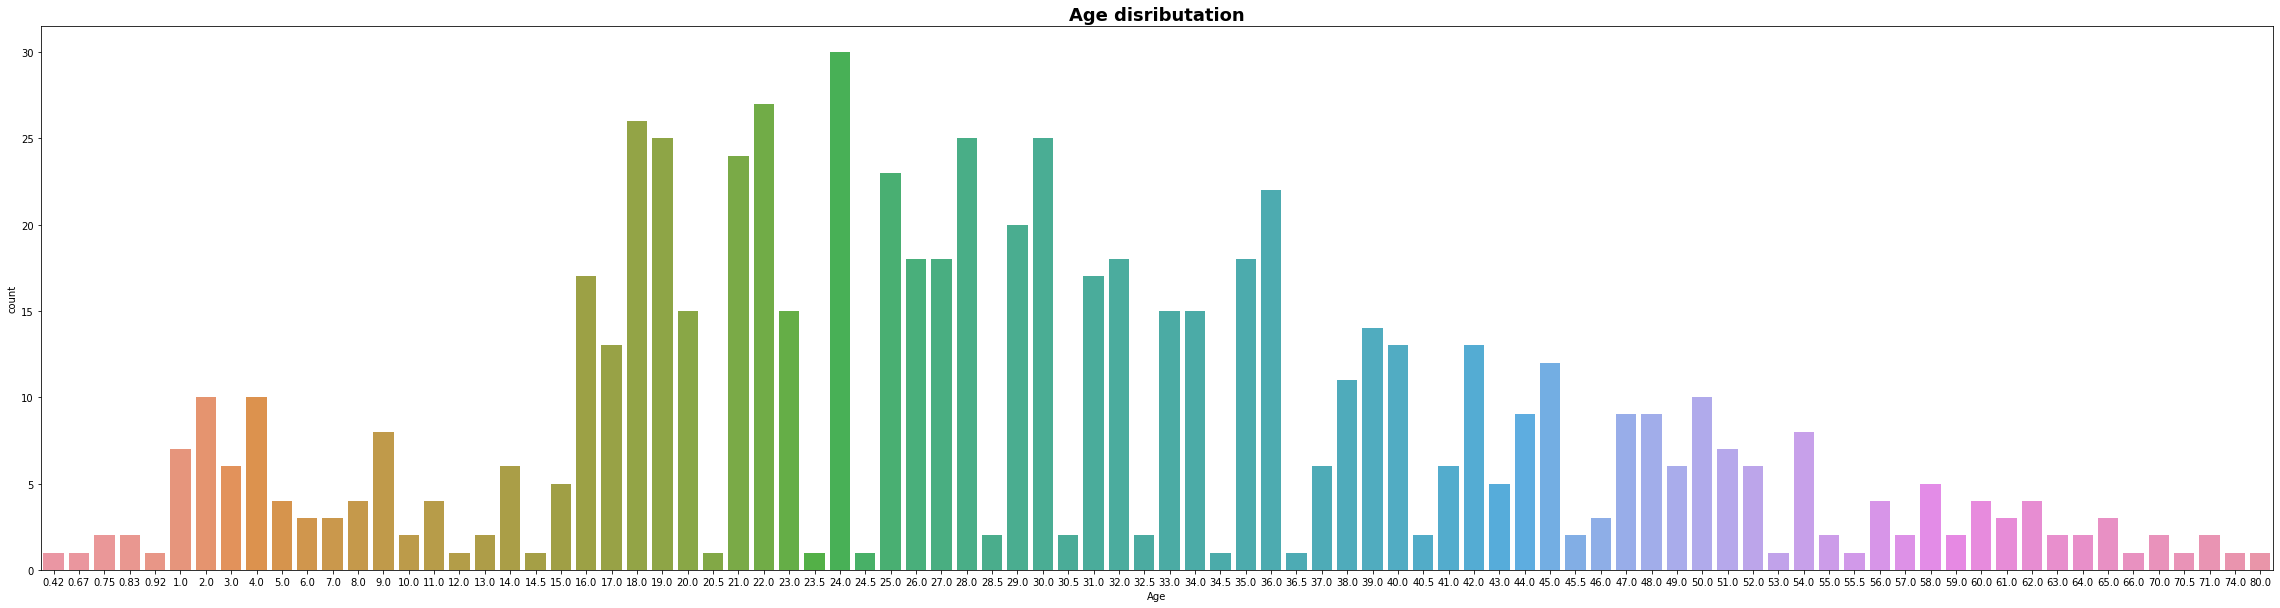

In [ ]:
ax = plt.subplots(figsize = (40,10))
ax=sns.countplot(x = data.Age)
ax.set_title('Age disributation',fontsize = 18, fontweight='bold' )

Text(0.5, 1.0, 'Age disributation for Survival')

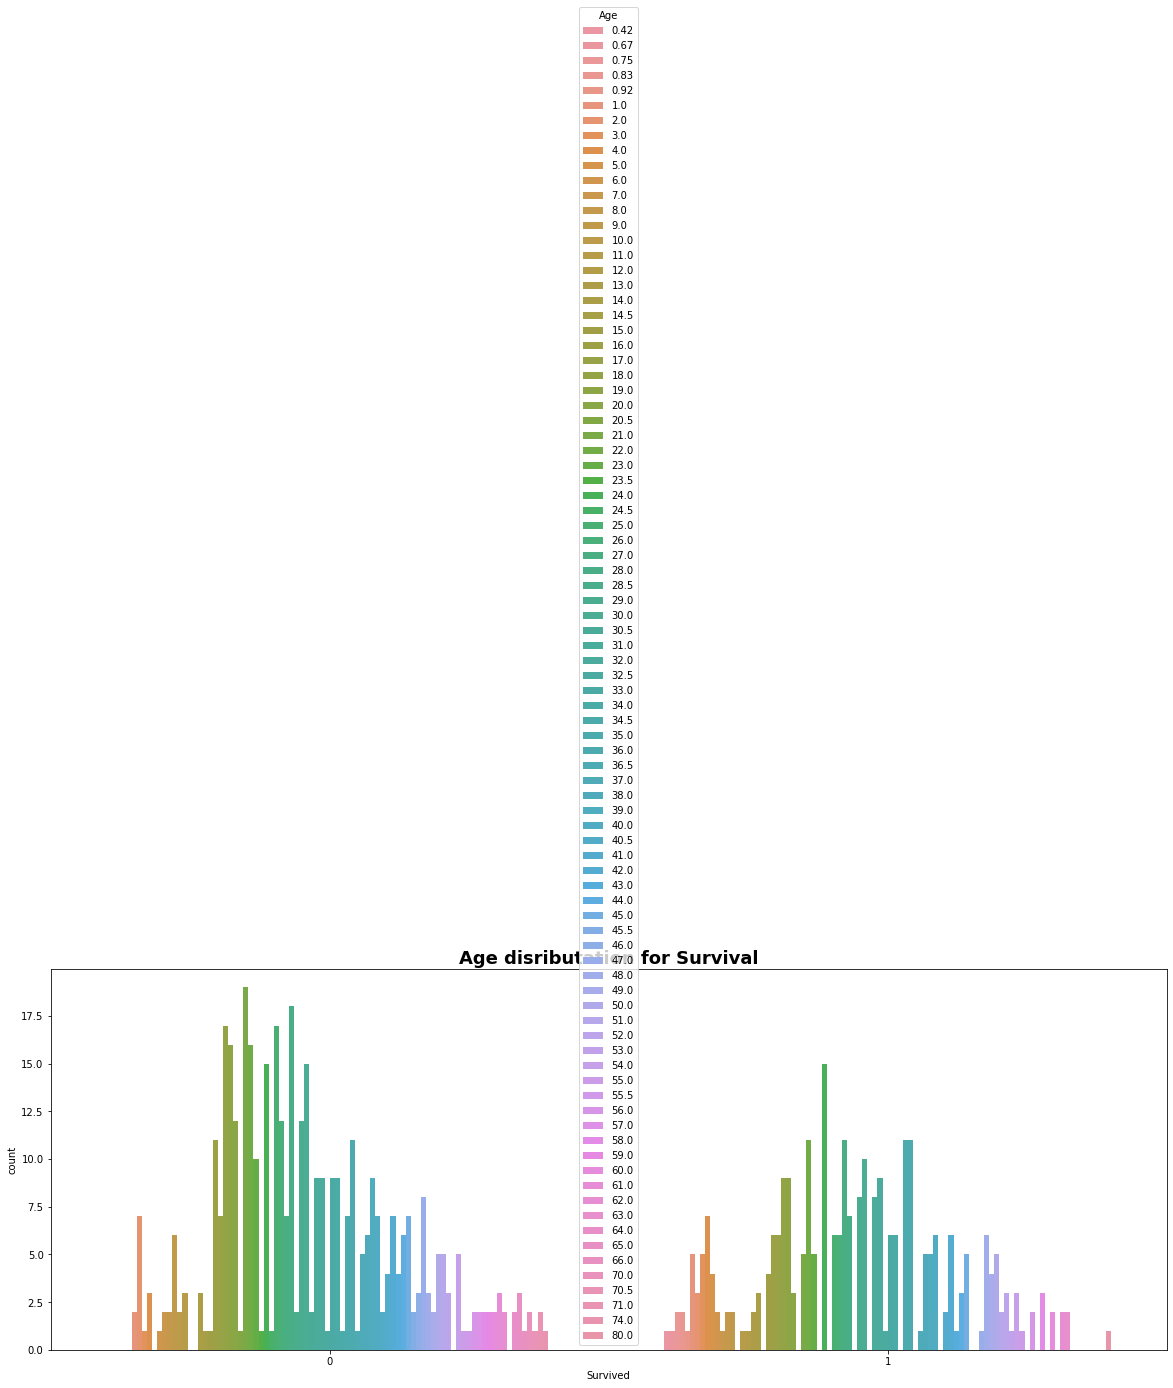

In [ ]:
ax = plt.subplots(figsize = (20,7))
ax=sns.countplot(x = data.Survived,hue = data.Age)
ax.set_title('Age disributation for Survival',fontsize = 18, fontweight='bold' )

Text(0, 0.5, 'Frequency')

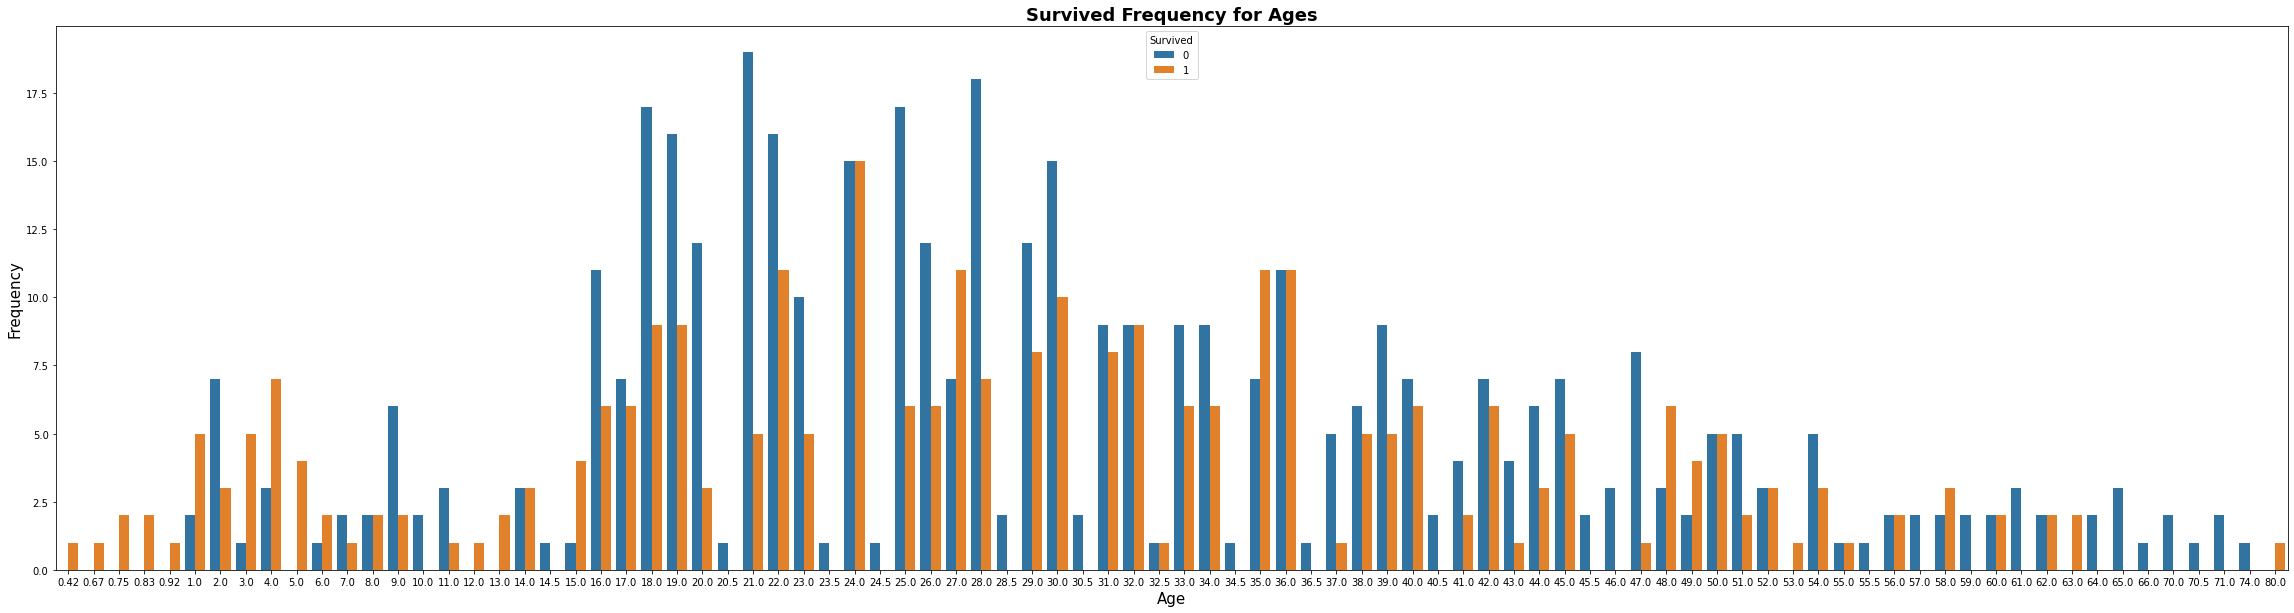

In [ ]:
countplt, ax = plt.subplots(figsize = (40,10))
ax = sns.countplot(hue = data.Survived,x = data.Age)
ax.set_title('Survived Frequency for Ages',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

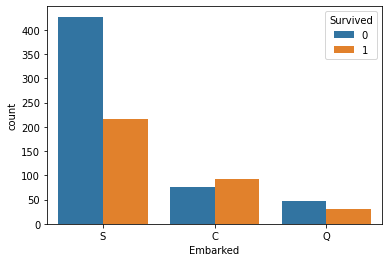

In [ ]:
sns.countplot(hue = data.Survived, x = data.Embarked)

In [10]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

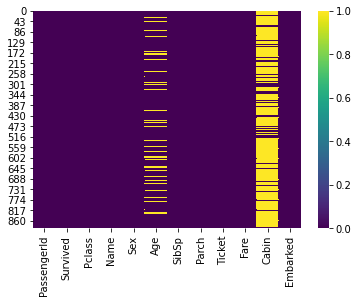

In [ ]:
#sns.heatmap(data.isnull())
sns.heatmap(data.isnull(),cmap='viridis')

In [13]:
data = data.drop(['PassengerId', 'Name', 'Ticket','Cabin'],axis=1)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

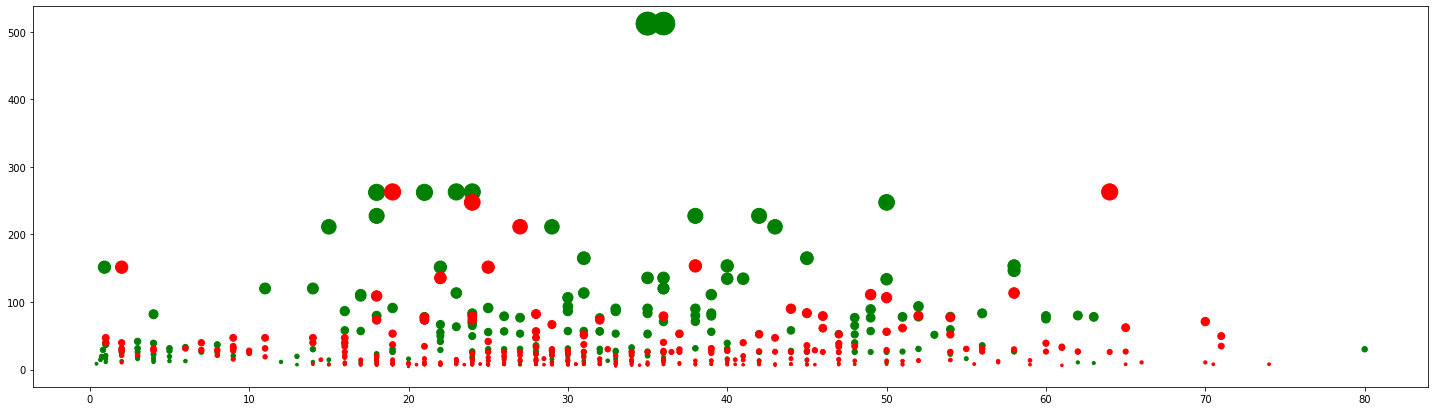

In [ ]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);

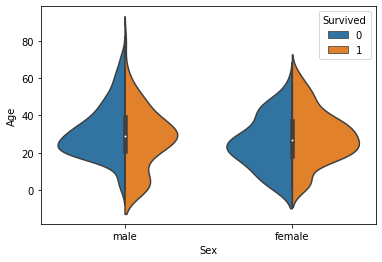

In [ ]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = data, split = True)

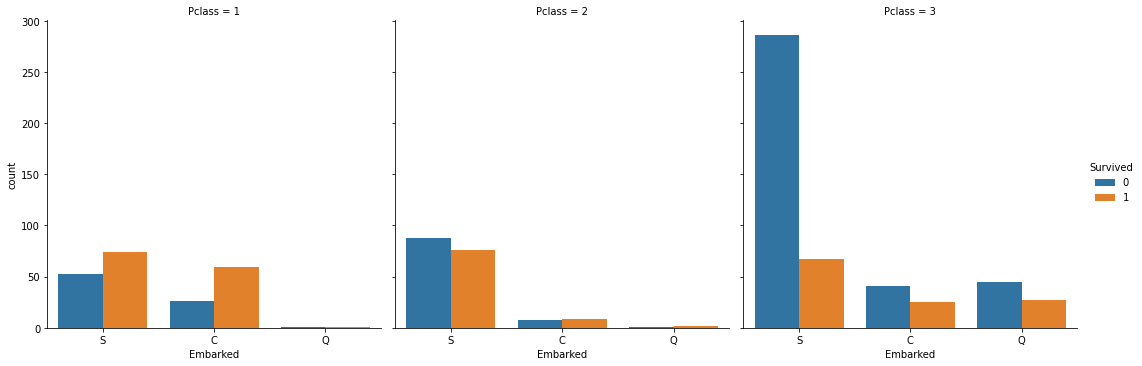

In [ ]:
sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data = data)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
data.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [21]:
# age average for class1 is 38, class2 30 and class3 25
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


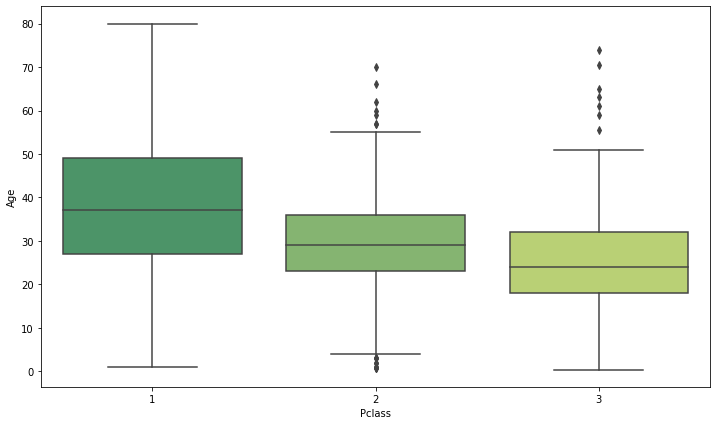

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='summer')

In [23]:
def impute_age(cols):
        Age = cols[0]
        Pclass = cols[1]

        if pd.isnull(Age):

            if Pclass == 1:
                return 38

            elif Pclass == 2:
                return 30

            else:
                return 25

        else:
            return Age

In [24]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)#filling the missing values

In [25]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [26]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [27]:
data = data.dropna()

In [28]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
data.shape

(889, 8)

In [30]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [31]:
gender = pd.get_dummies(data['Sex'], prefix = "Sex")

In [32]:
gender

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [33]:
classtype = pd.get_dummies(data['Pclass'], prefix = "Pclass")
classtype

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [34]:
embarkedtype = pd.get_dummies(data['Embarked'], prefix = "Embarked")
embarkedtype

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [35]:
data=pd.concat([data,gender,classtype,embarkedtype],axis=1)

In [36]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,1,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1


In [37]:
data = data.drop(['Pclass','Sex','Embarked'],axis=1)

In [38]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [39]:
data.drop(['Sex_female','Pclass_1','Embarked_C'],axis = 1)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,25.0,1,2,23.4500,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [40]:
data.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [41]:
Y = data.Survived

In [42]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [43]:
X = data.drop('Survived',axis=1)

In [44]:
X

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,1,0,1,0,0,0,1
887,19.0,0,0,30.0000,1,0,1,0,0,0,0,1
888,25.0,1,2,23.4500,1,0,0,0,1,0,0,1
889,26.0,0,0,30.0000,0,1,1,0,0,1,0,0


In [45]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=100,test_size=0.3) 

In [48]:
print(data.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(889, 13)
(622, 12)
(622,)
(267, 12)
(267,)


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(x_train,y_train)

LogisticRegression()

In [52]:
Ypred = model.predict(x_test)

In [53]:
Ypred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,Ypred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       160
           1       0.76      0.68      0.72       107

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.79      0.78       267



In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test,Ypred)

array([[137,  23],
       [ 34,  73]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,Ypred)

0.7865168539325843

In [60]:
model.predict_proba(x_test)

array([[0.91479183, 0.08520817],
       [0.39800563, 0.60199437],
       [0.9163266 , 0.0836734 ],
       [0.43448067, 0.56551933],
       [0.90134511, 0.09865489],
       [0.14980395, 0.85019605],
       [0.91638568, 0.08361432],
       [0.72571669, 0.27428331],
       [0.70244271, 0.29755729],
       [0.36082331, 0.63917669],
       [0.45705965, 0.54294035],
       [0.41355353, 0.58644647],
       [0.66765136, 0.33234864],
       [0.3908989 , 0.6091011 ],
       [0.11628514, 0.88371486],
       [0.91349927, 0.08650073],
       [0.83310609, 0.16689391],
       [0.57477517, 0.42522483],
       [0.62168843, 0.37831157],
       [0.90147243, 0.09852757],
       [0.23370079, 0.76629921],
       [0.21501346, 0.78498654],
       [0.92925218, 0.07074782],
       [0.93640285, 0.06359715],
       [0.06707649, 0.93292351],
       [0.19362805, 0.80637195],
       [0.27855809, 0.72144191],
       [0.9041012 , 0.0958988 ],
       [0.93477352, 0.06522648],
       [0.64071135, 0.35928865],
       [0.

In [61]:
#Precision Score =        137/(137+34) = 0.8011
#Recall Score =           137/(137+23) = 0.8562
#Accuracy Score =         (137+73)/(137+73+23+34) = 0.7851
#F1-Score =               2*0.8011*0.8562/(0.8011+0.8562) = 0.8277
#misclassification rate = (34+23)/267 = 0.2134
#